In [1]:
from six.moves import urllib
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
#read in lists of male and female names
femaleNames = pd.read_table("femaleNames.txt",skiprows=1)
maleNames = pd.read_table("maleNames.txt",skiprows=1)

#convert to list
femaleNames = femaleNames['Name'].tolist()
maleNames = maleNames['Name'].tolist()

In [3]:
def n_total_papers(year,month):
        
    #url of arxiv page with first 25 papers in the month
    url25 = "https://arxiv.org/list?archive=astro-ph&year=" + year + "&month=" + month +"&submit=Go" 
    
    page25 = urllib.request.urlopen(url25)
    soup25 = BeautifulSoup(page25, "html.parser")
    
    n = soup25.find_all("small")
    total_papers = (n[0].text.split("total of ")[1]).split(" entries")[0]
    
    return int(total_papers)

In [4]:
#define function to count number of male/female authors
def count(year,month):

    #find total number of papers to determine correct url
    total_papers = n_total_papers(year,month)
    
    urlall = "https://arxiv.org/list/astro-ph/" + year + month + "?show=" + str(total_papers)
    #e.g. in February 2022 there were 1205 papers so the url is 
    #https://arxiv.org/list/astro-ph/2202?show=1205

    page = urllib.request.urlopen(urlall)
    soup = BeautifulSoup(page, "html.parser")    

    a = soup.find_all("a", href=True)

    authors=[]
    for a in soup.find_all('a', href=True):
        if 'author' in a['href']:
            authors.append(a.string)
    
    #take first name only 
    firstNames = []
    for ai in authors:
        firstNames.append(ai.split(' ')[0])

    n_female=0
    n_male=0

    for name in firstNames:
        if name in femaleNames:
            n_female += 1
        if name in maleNames:
            n_male += 1
            
    return n_female, n_male

In [22]:
years = ['19','20','21']#['10','11','12','13','14','15','16','17','18','19','20','21']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [23]:
d = {'year_month': [], 'n_female': [], 'n_male': []}
n_gender_by_month = pd.DataFrame(data=d)        

In [24]:
for year in years:
    for month in months:
        print 'Year:' + year + ' Month:' + str(month)
        n_female,n_male = count(year,month)
        year_month = str(year) +'_' + str(month)
        n_gender_by_month = n_gender_by_month.append({'year_month':year_month,'n_female':n_female,'n_male':n_male}, ignore_index=True)


Year:19 Month:01
Year:19 Month:02
Year:19 Month:03
Year:19 Month:04
Year:19 Month:05
Year:19 Month:06
Year:19 Month:07
Year:19 Month:08
Year:19 Month:09
Year:19 Month:10
Year:19 Month:11
Year:19 Month:12
Year:20 Month:01
Year:20 Month:02
Year:20 Month:03
Year:20 Month:04
Year:20 Month:05
Year:20 Month:06
Year:20 Month:07
Year:20 Month:08
Year:20 Month:09
Year:20 Month:10
Year:20 Month:11
Year:20 Month:12
Year:21 Month:01
Year:21 Month:02
Year:21 Month:03
Year:21 Month:04
Year:21 Month:05
Year:21 Month:06
Year:21 Month:07
Year:21 Month:08
Year:21 Month:09
Year:21 Month:10
Year:21 Month:11
Year:21 Month:12


In [14]:
#table_gender = n_gender_by_month
### save table

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

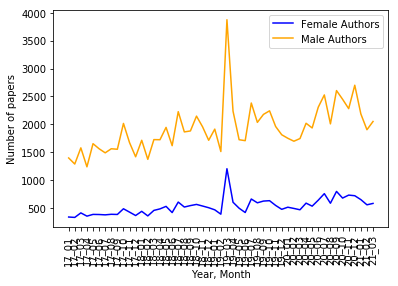

In [9]:
#plot number of papers by male/female authors by month
plt.plot(n_gender_by_month['year_month'],n_gender_by_month['n_female'],color='blue',label='Female Authors')
plt.plot(n_gender_by_month['year_month'],n_gender_by_month['n_male'],color='orange',label='Male Authors')
plt.legend()
plt.ylabel('Number of papers')
plt.xlabel('Year, Month')
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 <a list of 36 Text xticklabel objects>)

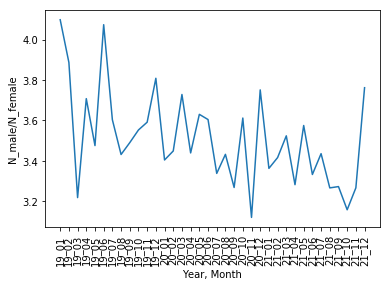

In [26]:
#plot number of papers by male/female authors by month
plt.plot(n_gender_by_month['year_month'],(n_gender_by_month['n_male']/n_gender_by_month['n_female']))
#plt.legend()
plt.ylabel('N_male/N_female')
plt.xlabel('Year, Month')
plt.xticks(rotation=90)

In [11]:
npoints = len(n_gender_by_month['year_month'][0:40])

In [19]:
#linear fit to results
slope, intercept, r, p, se = stats.linregress(range(npoints),n_gender_by_month['n_male']/n_gender_by_month['n_female'])
line = np.array(range(npoints))*slope +intercept

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

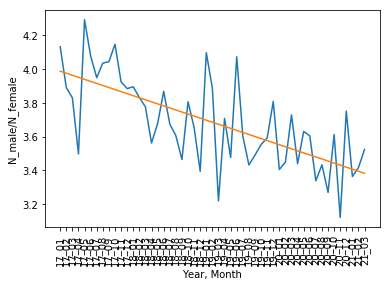

In [13]:
#plot number of papers by male/female authors by month
plt.plot(n_gender_by_month['year_month'],n_gender_by_month['n_male']/n_gender_by_month['n_female'])
plt.plot(n_gender_by_month['year_month'],line)
#plt.legend()
plt.ylabel('N_male/N_female')
plt.xlabel('Year, Month')
plt.xticks(rotation=90)